# Neighborhood Conditions: Distance Matrix

In [1]:
import json
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import cm

In [2]:
# Adjust display options to show all columns
pd.set_option('display.max_columns', None)

In [3]:
json_directory = r"C:\Users\sb013698\Desktop\github\Deep Model Fusion for UBEM\Distance Matrix"
file_name = os.path.join(json_directory, "project.json")

### Obtain Window-to-Wall Ratios

In [4]:
# Load the JSON file
with open(file_name, encoding='utf-8') as file:
    data = json.load(file)

# Dictionary to store extracted results
wwr_data = {
    "Building Name": list(),
    "Archetype": list(),
    "WWR": list(),
}

# Loop through features and extract WwrE based on TemplateName
for feature in data["features"]:
    properties = feature.get("properties", {})
    building_name = properties.get("Name")
    template_name = properties.get("TemplateName")
    wwr = properties.get("WwrE")

    if template_name and wwr is not None:
        wwr_data["Building Name"].append(building_name)
        wwr_data["Archetype"].append(template_name)
        wwr_data["WWR"].append(wwr)

# Convert the dictionary into a DataFrame
wwr_df = pd.DataFrame(wwr_data)
wwr_df

,Building Name,Archetype,WWR
0,Kadın Sığınma Evi,Huzurevi,0.134
1,Şefkat Sitesi,Huzurevi,0.134
2,Zümrüt Sitesi,Huzurevi,0.100
3,Çınar Sitesi,Huzurevi,0.100
4,Apart B,Otel,0.061
5,İdari Bina A Blok,Ofis,0.245
6,Apart A,Otel,0.061
7,Sevgi Sitesi,Huzurevi,0.200
8,Fizik Tedavi,Saglik Merkezi,0.429
9,Papatya Sitesi,Huzurevi,0.100


### Obtain Coordinates

In [5]:
import json

# Load your JSON data (replace 'your_file.json' with your JSON file path)
with open(file_name, "r", encoding='utf-8') as file:
    data = json.load(file)

# Loop through the features and check the length of coordinates
for feature in data["features"]:
    coordinates = feature["geometry"]["coordinates"]
    
    # Count the number of points in the coordinate list
    length_of_coordinates = sum(len(polygon[0]) for polygon in coordinates)
    
    # Print the length and associated feature name (or other properties)
    building_name = feature["properties"].get("Name")
    print(f"{building_name}, Number of Coordinates: {length_of_coordinates}")

Kadın Sığınma Evi, Number of Coordinates: 17
Şefkat Sitesi, Number of Coordinates: 39
Zümrüt Sitesi, Number of Coordinates: 28
Çınar Sitesi, Number of Coordinates: 52
Apart B, Number of Coordinates: 13
İdari Bina A Blok, Number of Coordinates: 25
Apart A, Number of Coordinates: 13
Sevgi Sitesi, Number of Coordinates: 61
Fizik Tedavi, Number of Coordinates: 13
Papatya Sitesi, Number of Coordinates: 18
Dolunay Sitesi, Number of Coordinates: 15
Umut Sitesi, Number of Coordinates: 38
El Sanatları, Number of Coordinates: 17
İdari Bina B Blok, Number of Coordinates: 31
Güven Sitesi, Number of Coordinates: 62
Sinema Salonu, Number of Coordinates: 27
Spor Salonu, Number of Coordinates: 18
Poliklinik, Number of Coordinates: 42
Huzur Sitesi, Number of Coordinates: 45


In [6]:
# Load your JSON data
with open(file_name, "r", encoding='utf-8') as file:
    data = json.load(file)

# Prepare a list to hold rows of data
rows = list()
coordinate_counts = list()
height_list = list()
floor_counts = list()
footprint_list = list()

# Loop through the features and extract the coordinates
for feature in data["features"]:
    coordinates = feature["geometry"]["coordinates"]
    # Count the number of points in the coordinate list
    n_coordinates = sum(len(polygon[0]) for polygon in coordinates)
    coordinate_counts.append(n_coordinates)
    # Number of floors and total heights
    properties = feature.get("properties", {})
    n_floors = properties.get("FloorCount")
    height = properties.get("Height")
    height_list.append(height)
    floor_counts.append(n_floors)
    # Area of building footprints
    footprint = properties.get("GrossFloorArea") / n_floors
    footprint_list.append(footprint)

    
    # Flatten the coordinate list to a single list of tuples
    flat_coords = [tuple(coord) for polygon in coordinates for coord in polygon[0]]
    
    # Get building name
    building_name = feature["properties"].get("Name")
    
    # Append the data to rows
    rows.append([building_name] + flat_coords)

# Determine the maximum number of coordinates
max_coords = max(len(row) - 1 for row in rows)  # Subtract 1 for building name column

# Normalize rows by padding shorter ones with NaN
padded_rows = [
    row + [np.nan] * (max_coords - (len(row) - 1))  # Subtract 1 for the building name
    for row in rows
]

# Create a DataFrame
columns = ["Building Name"] + [f"Coordinate_{i+1}" for i in range(max_coords)]
coordinate_df = pd.DataFrame(padded_rows, columns=columns)
coordinate_df["Height"] = height_list
coordinate_df["Floor Count"] = floor_counts
coordinate_df["Footprint Area"] = footprint_list
coordinate_df["Coordinate Count"] = coordinate_counts
coordinate_df.head(5)

,Building Name,Coordinate_1,Coordinate_2,Coordinate_3,Coordinate_4,Coordinate_5,Coordinate_6,Coordinate_7,Coordinate_8,Coordinate_9,Coordinate_10,Coordinate_11,Coordinate_12,Coordinate_13,Coordinate_14,Coordinate_15,Coordinate_16,Coordinate_17,Coordinate_18,Coordinate_19,Coordinate_20,Coordinate_21,Coordinate_22,Coordinate_23,Coordinate_24,Coordinate_25,Coordinate_26,Coordinate_27,Coordinate_28,Coordinate_29,Coordinate_30,Coordinate_31,Coordinate_32,Coordinate_33,Coordinate_34,Coordinate_35,Coordinate_36,Coordinate_37,Coordinate_38,Coordinate_39,Coordinate_40,Coordinate_41,Coordinate_42,Coordinate_43,Coordinate_44,Coordinate_45,Coordinate_46,Coordinate_47,Coordinate_48,Coordinate_49,Coordinate_50,Coordinate_51,Coordinate_52,Coordinate_53,Coordinate_54,Coordinate_55,Coordinate_56,Coordinate_57,Coordinate_58,Coordinate_59,Coordinate_60,Coordinate_61,Coordinate_62,Height,Floor Count,Footprint Area,Coordinate Count
0,Kadın Sığınma Evi,"(62.61574500775896, -181.82562972418964)","(60.95407134958077, -193.93490417581052)","(66.72734217357356, -194.71566951368004)","(66.49478014127817, -196.31049846392125)","(75.47483815136366, -197.51938748825341)","(75.32204643369187, -198.60520608816296)","(78.58119186933618, -198.97288990858942)","(78.74384398467373, -197.7602666420862)","(87.67039417638443, -199.14727586880326)","(87.88288150413428, -197.64378742408007)","(93.68375277076848, -198.44181538000703)","(95.20143826364074, -186.5039837313816)","(89.59660566155799, -185.6051634280011)","(89.70440382149536, -184.0774575760588)","(68.60345961560961, -181.16587722767144)","(68.44530658319127, -182.67250445578247)","(62.61574500775896, -181.82562972418964)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,3,469.446571,17
1,Şefkat Sitesi,"(62.79710707254708, 196.56824108958244)","(64.06913111801259, 187.30941945593804)","(63.46671433234587, 187.19566747080535)","(64.60374918568414, 178.9303442146629)","(65.1520528747933, 179.029022725299)","(66.42776899191085, 169.94802114088088)","(73.88085839827545, 171.1436037272215)","(73.83414853701834, 172.08969666343182)","(77.234550603549, 172.62535150907934)","(77.16064977436326, 173.71638853941113)","(83.12619306484703, 174.54368829820305)","(83.30211168876849, 173.5469987327233)","(86.81380684510805, 174.01764561794698)","(86.99565496470314, 172.9709349842742)","(90.8717132860329, 173.59376776963472)","(90.92897766293027, 173.2083265259862)","(94.59340855607297, 173.7474457686767)","(94.17063242197037, 176.74551951885223)","(93.86803412705194, 176.65908658504486)","(93.48128603876103, 179.51711066439748)","(93.78999314981047, 179.5537379430607)","(93.37067898502573, 182.89370202738792)","(93.7691243843874, 182.974229731597)","(92.75763106707018, 191.45278528891504)","(92.15752447920386, 191.41175010427833)","(90.87353963311762, 200.46525141131133)","(87.29257908498403, 200.02444546390325)","(87.32126146228984, 199.67904743831605)","(83.16831487545278, 199.17077348008752)","(83.27731985691935, 198.42691581323743)","(79.76969953207299, 197.965623838827)","(79.99965466780122, 196.6834366042167)","(74.15762945450842, 195.83697256166488)","(73.98701448377687, 196.9705192949623)","(70.53747863369063, 196.39715247228742)","(70.41324901138432, 197.3453918909654)","(66.5288103937637, 196.8497358309105)","(66.53041235147975, 197.10032191872597)","(62.79710707254708, 196.56824108958244)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,6,725.668424,39
2,Zümrüt Sitesi,"(145.1211550430162, -13.42956989724189)","(144.8409804000985, -5.2456555385142565)","(142.98966017353814, -5.3522861283272505)","(142.95007452368736, 5.485500645823777)","(144.91971792513505, 5.578781859949231)","(144.91054475249257, 13.72018028050661)","(134.4328966483008, 13.437637687660754)","(134.63706748746336, 5.538068781606853)","(132.7838254525559, 5.499001

### Calculate polygon areas and centroids

In [7]:
# Function to calculate signed area of a polygon
def calculate_polygon_area(coords):
    # Ensure the polygon is closed
    coords = np.array(coords)
    if not np.array_equal(coords[0], coords[-1]):
        coords = np.vstack([coords, coords[0]])
    
    # Extract x and y coordinates
    x = coords[:, 0]
    y = coords[:, 1]
    
    # Shoelace formula
    area = 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))
    return area

# Initialize a list to store areas
areas = []

# Iterate over each row in coordinate_df
for idx, row in coordinate_df.iterrows():
    # Extract coordinates for the current building
    coords = []
    for col in coordinate_df.columns:
        if "Coordinate_" in col and not pd.isna(row[col]):
            coords.append(row[col])  # Each "Coordinate_i" is a (x, y) tuple
    
    # Compute the area and append
    if coords:
        area = calculate_polygon_area(coords)
    else:
        area = np.nan  # Handle cases where no coordinates exist
    areas.append(area)

# Add the computed areas to the DataFrame
coordinate_df["Calculated Footprint Area"] = areas

In [8]:
# Function to calculate the centroid of a polygon
def calculate_centroid(coords, area):
    if len(coords) < 3 or np.isnan(area):
        # A valid polygon requires at least 3 points and a valid area
        return np.nan, np.nan
    
    # Ensure the polygon is closed
    coords = np.array(coords)
    if not np.array_equal(coords[0], coords[-1]):
        coords = np.vstack([coords, coords[0]])
    
    # Extract x and y coordinates
    x = coords[:, 0]
    y = coords[:, 1]
    
    # Shoelace formula for centroid components
    cx = 0
    cy = 0
    for i in range(len(x) - 1):
        factor = (x[i] * y[i + 1] - x[i + 1] * y[i])
        cx += (x[i] + x[i + 1]) * factor
        cy += (y[i] + y[i + 1]) * factor
    
    # Normalize by the signed area
    cx /= (6 * area)
    cy /= (6 * area)
    
    return cx, cy

# Initialize lists to store centroids
centroids_x = []
centroids_y = []

# Iterate over each row in coordinate_df
for idx, row in coordinate_df.iterrows():
    # Extract coordinates, ignoring NaN values
    coords = [
        row[col] for col in coordinate_df.columns
        if "Coordinate_" in col and not pd.isna(row[col])
    ]
    
    # Convert coordinates to (x, y) tuples
    coords = [tuple(coord) for coord in coords if isinstance(coord, (list, tuple, np.ndarray))]
    
    # Get the footprint area
    area = row["Calculated Footprint Area"]
    
    # Compute the centroid
    cx, cy = calculate_centroid(coords, area)
    centroids_x.append(cx)
    centroids_y.append(cy)

# Add the centroids to the DataFrame
coordinate_df["Centroid X"] = centroids_x
coordinate_df["Centroid Y"] = centroids_y

In [9]:
# Merge the two DataFrames on 'Building Name'
merged_df = pd.merge(wwr_df, coordinate_df, on='Building Name')

# Define the desired column order
desired_columns = (
    ['Building Name', 'Archetype', 'Footprint Area', 'Calculated Footprint Area', 'Floor Count', 
     'Height', 'WWR', 'Coordinate Count', 'Centroid X', 'Centroid Y'] +
    [f'Coordinate_{i}' for i in range(1, 63)]  # Adjust to maximum number of coordinates
)

# Reorder columns
final_df = merged_df[desired_columns]

# Save fina_df to a CSV file
final_df.to_csv("coordinates.csv", index=False)

final_df.head()

,Building Name,Archetype,Footprint Area,Calculated Footprint Area,Floor Count,Height,WWR,Coordinate Count,Centroid X,Centroid Y,Coordinate_1,Coordinate_2,Coordinate_3,Coordinate_4,Coordinate_5,Coordinate_6,Coordinate_7,Coordinate_8,Coordinate_9,Coordinate_10,Coordinate_11,Coordinate_12,Coordinate_13,Coordinate_14,Coordinate_15,Coordinate_16,Coordinate_17,Coordinate_18,Coordinate_19,Coordinate_20,Coordinate_21,Coordinate_22,Coordinate_23,Coordinate_24,Coordinate_25,Coordinate_26,Coordinate_27,Coordinate_28,Coordinate_29,Coordinate_30,Coordinate_31,Coordinate_32,Coordinate_33,Coordinate_34,Coordinate_35,Coordinate_36,Coordinate_37,Coordinate_38,Coordinate_39,Coordinate_40,Coordinate_41,Coordinate_42,Coordinate_43,Coordinate_44,Coordinate_45,Coordinate_46,Coordinate_47,Coordinate_48,Coordinate_49,Coordinate_50,Coordinate_51,Coordinate_52,Coordinate_53,Coordinate_54,Coordinate_55,Coordinate_56,Coordinate_57,Coordinate_58,Coordinate_59,Coordinate_60,Coordinate_61,Coordinate_62
0,Kadın Sığınma Evi,Huzurevi,469.446571,469.446571,3,9.0,0.134,17,78.078195,-190.218451,"(62.61574500775896, -181.82562972418964)","(60.95407134958077, -193.93490417581052)","(66.72734217357356, -194.71566951368004)","(66.49478014127817, -196.31049846392125)","(75.47483815136366, -197.51938748825341)","(75.32204643369187, -198.60520608816296)","(78.58119186933618, -198.97288990858942)","(78.74384398467373, -197.7602666420862)","(87.67039417638443, -199.14727586880326)","(87.88288150413428, -197.64378742408007)","(93.68375277076848, -198.44181538000703)","(95.20143826364074, -186.5039837313816)","(89.59660566155799, -185.6051634280011)","(89.70440382149536, -184.0774575760588)","(68.60345961560961, -181.16587722767144)","(68.44530658319127, -182.67250445578247)","(62.61574500775896, -181.82562972418964)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Şefkat Sitesi,Huzurevi,725.668424,725.668424,6,18.0,0.134,39,78.656926,185.215503,"(62.79710707254708, 196.56824108958244)","(64.06913111801259, 187.30941945593804)","(63.46671433234587, 187.19566747080535)","(64.60374918568414, 178.9303442146629)","(65.1520528747933, 179.029022725299)","(66.42776899191085, 169.94802114088088)","(73.88085839827545, 171.1436037272215)","(73.83414853701834, 172.08969666343182)","(77.234550603549, 172.62535150907934)","(77.16064977436326, 173.71638853941113)","(83.12619306484703, 174.54368829820305)","(83.30211168876849, 173.5469987327233)","(86.81380684510805, 174.01764561794698)","(86.99565496470314, 172.9709349842742)","(90.8717132860329, 173.59376776963472)","(90.92897766293027, 173.2083265259862)","(94.59340855607297, 173.7474457686767)","(94.17063242197037, 176.74551951885223)","(93.86803412705194, 176.65908658504486)","(93.48128603876103, 179.51711066439748)","(93.78999314981047, 179.5537379430607)","(93.37067898502573, 182.89370202738792)","(93.7691243843874, 182.974229731597)","(92.75763106707018, 191.45278528891504)","(92.15752447920386, 191.41175010427833)","(90.87353963311762, 200.46525141131133)","(87.29257908498403, 200.02444546390325)","(87.32126146228984, 199.67904743831605)","(83.16831487545278, 199.17077348008752)","(83.27731985691935, 198.42691581323743)","(79.76969953207299, 197.965623838827)","(79.99965466780122, 196.6834366042167)","(74.15762945450842, 195.83697256166488)","(73.98701448377687, 196.9705192949623)","(70.53747863369063, 196.39715247228742)","(70.41324901138432, 197.3453918909654)","(66.5288103937637, 196.8497358309105)","(66.53041235147975, 197.10032191872597)","(62.79710707254708, 196.56824108958244)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Zümrüt Sitesi,Huzurevi,668.874082,668.874082,3,9.0,0.100,28,130.826696,-0.384018,"(145.1211550430162, -13.42956989724189)","(144.8409804000985, -5.2456555385142565)","(142.98966017353814, -5.3522861283272505)","(142.950074523

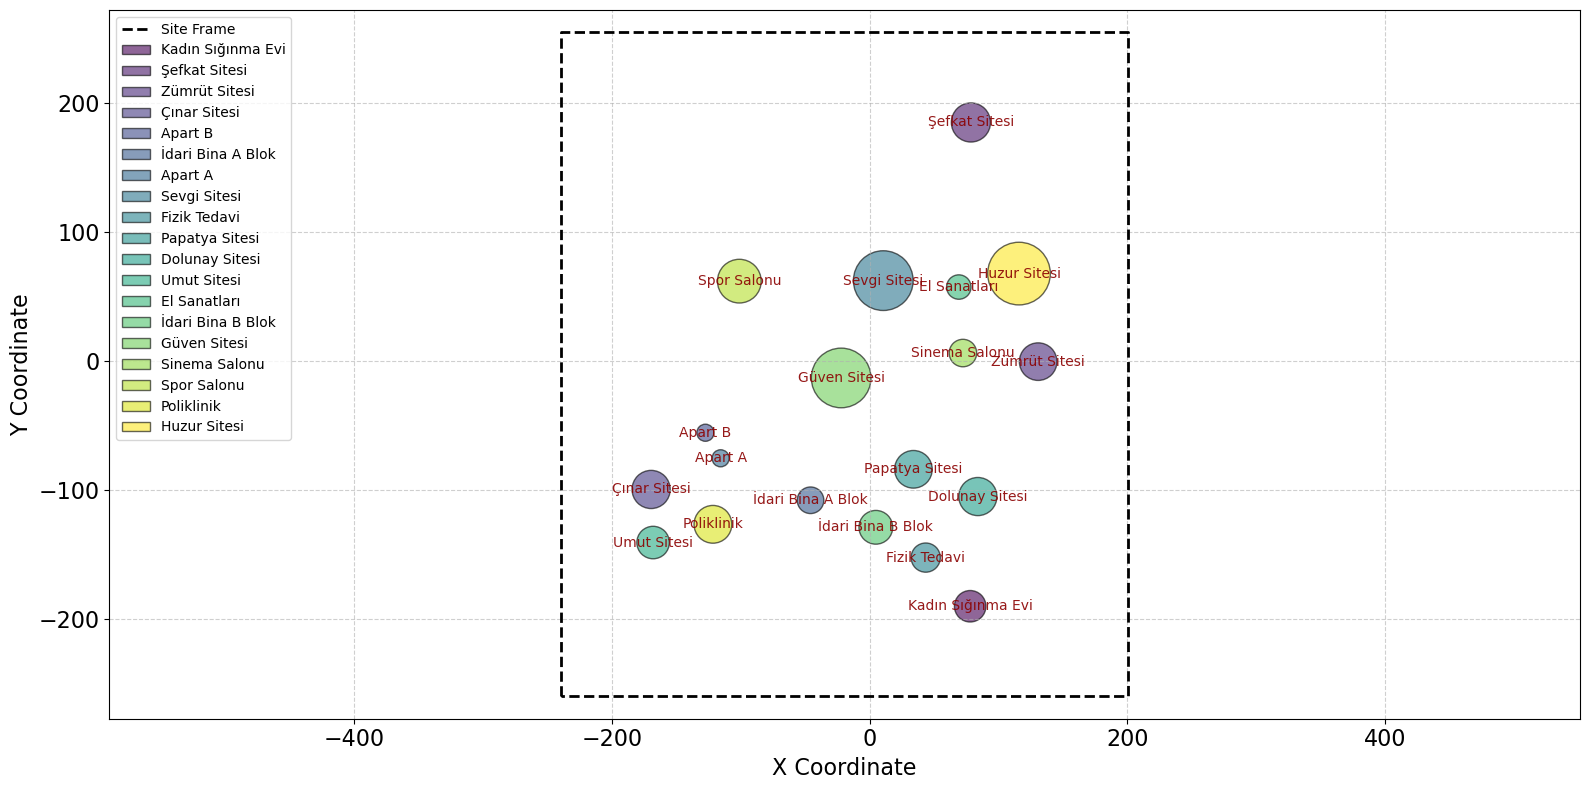

In [10]:
# Extract relevant data
centroids_x = coordinate_df["Centroid X"].dropna().tolist()  # Extract X coordinates and drop NaN
centroids_y = coordinate_df["Centroid Y"].dropna().tolist()  # Extract Y coordinates and drop NaN
building_names = coordinate_df["Building Name"].dropna().tolist()  # Extract building names and drop NaN
footprint_areas = coordinate_df["Calculated Footprint Area"].dropna().tolist()  # Extract footprint areas and drop NaN

# Calculate radii based on footprint area
radii = [np.sqrt(area / np.pi) for area in footprint_areas]

# Determine the boundaries for the frame
min_x = min(centroids_x) - 70  # Adding some padding around the site
max_x = max(centroids_x) + 70
min_y = min(centroids_y) - 70
max_y = max(centroids_y) + 70

# Create the scatter plot with circles and the frame
plt.figure(figsize=(16, 8))

# Plot the frame (bounding box) as a dashed line
plt.plot([min_x, min_x, max_x, max_x, min_x], 
         [min_y, max_y, max_y, min_y, min_y], 
         color='black', lw=2, linestyle='--', 
         label="Site Frame",
)

# Use the viridis colormap for coloring
cmap = cm.viridis  # You can change 'viridis' to any other colormap you prefer
norm = plt.Normalize(vmin=0, vmax=len(centroids_x) - 1)  # Normalize the indices to colormap range

# Loop over coordinates and building names to draw circles
for i in range(len(centroids_x)):
    x = centroids_x[i]
    y = centroids_y[i]
    radius = radii[i]
    name = building_names[i]
    
    # Get the color from the colormap
    color = cmap(norm(i))
    
    # Create the circle for the building with dynamic color
    #circle = plt.Circle((x, y), radius, color=color, alpha=0.6, edgecolor='k', label=name)
    circle = plt.Circle((x, y), radius, facecolor=color, alpha=0.6, edgecolor='k', label=name)
    plt.gca().add_artist(circle)
    
    # Annotate each building's centroid with smaller font size
    plt.text(x, y, name, fontsize=10, ha='center', va='center', color='darkred', alpha=0.9)

# Add grid and labels
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel("X Coordinate", fontsize=16)
plt.ylabel("Y Coordinate", fontsize=16)
plt.legend(fontsize=10, loc='upper left')
plt.axis("equal")

# Increase the size of the x and y ticks
plt.tick_params(axis='both', labelsize=16)

# Show the plot
plt.tight_layout()

# Save the figure to a local directory
plt.savefig("site_layout.png", dpi=300, bbox_inches="tight")

# Show the plot in the notebook
plt.show()

### Calculate centroidal distances between building pairs

In [11]:
# Assuming coordinate_df contains 'Centroid X', 'Centroid Y', and 'Footprint Area' columns
# Extract the data from coordinate_df
centroids_x = coordinate_df["Centroid X"].dropna().tolist()
centroids_y = coordinate_df["Centroid Y"].dropna().tolist()
footprint_areas = coordinate_df["Footprint Area"].dropna().tolist()

# Calculate radii based on footprint areas
radii = [np.sqrt(area / np.pi) for area in footprint_areas]

# Create an empty list to store the distances
distances = []

# Loop over all building pairs
for i in range(len(centroids_x)):
    row_distances = []  # To store distances for the current building
    for j in range(len(centroids_x)):
        if i == j:
            row_distances.append(0)  # Distance between a building and itself is 0
        else:
            # Calculate Euclidean distance between centroids
            d_centroid = np.sqrt((centroids_x[j] - centroids_x[i])**2 + (centroids_y[j] - centroids_y[i])**2)
            
            # Calculate the minimum distance by subtracting the radii
            d_min = d_centroid - (radii[i] + radii[j])
            
            # If the result is negative, set it to 0 (indicating overlap)
            d_min = max(d_min, 0)
            
            row_distances.append(d_min)
    
    distances.append(row_distances)

# Convert distances to a DataFrame for easier analysis
distance_df = pd.DataFrame(distances, columns=building_names, index=building_names)

# Save distance matrix to a CSV file
distance_df.to_csv("distance_matrix.csv", encoding='utf-8')

# Show the distance matrix
distance_df

,Kadın Sığınma Evi,Şefkat Sitesi,Zümrüt Sitesi,Çınar Sitesi,Apart B,İdari Bina A Blok,Apart A,Sevgi Sitesi,Fizik Tedavi,Papatya Sitesi,Dolunay Sitesi,Umut Sitesi,El Sanatları,İdari Bina B Blok,Güven Sitesi,Sinema Salonu,Spor Salonu,Poliklinik,Huzur Sitesi
Kadın Sığınma Evi,0.000000,348.011994,170.211145,236.616207,226.784597,126.150508,206.283863,226.131481,27.577163,88.205067,58.318228,226.137402,226.162337,70.143899,168.130149,173.691354,280.231534,182.637596,224.382951
Şefkat Sitesi,348.011994,0.000000,163.002610,347.737108,295.063709,292.984770,303.190705,101.918015,312.949318,243.021446,260.347567,380.959810,103.374200,294.412030,184.018302,153.178324,185.694580,340.733433,83.549032
Zümrüt Sitesi,170.211145,163.002610,0.000000,286.887629,242.807388,181.901529,236.342251,97.841754,149.388678,98.668607,85.289479,302.934989,60.412388,152.293174,115.649004,33.503186,208.594452,252.952001,31.012648
Çınar Sitesi,236.616207,347.737108,286.887629,0.000000,39.455479,98.837605,37.649166,204.329383,193.395107,174.712171,223.977989,13.777526,261.518027,148.908544,133.017723,238.621136,143.764511,25.585168,291.866457
Apart B,226.784597,295.063709,242.807388,39.455479,0.000000,79.980777,9.779811,151.804093,178.525222,142.633740,195.685767,75.110809,210.716917,131.493025,83.807558,191.874747,96.936284,49.998939,241.938593
İdari Bina A Blok,126.150508,292.984770,181.901529,98.837605,79.980777,0.000000,60.037534,146.048287,78.177683,58.435938,104.736959,103.550037,181.740632,31.409866,64.375952,143.438240,151.498386,53.025823,204.344030
Apart A,206.283863,303.190705,236.342251,37.649166,9.779811,60.037534,0.000000,157.109725,158.861755,128.607323,180.365781,64.530938,211.540964,112.075802,82.623550,187.696117,114.618759,30.297281,241.364337
Sevgi Sitesi,226.131481,101.918015,97.841754,204.329383,151.804093,146.048287,157.109725,0.000000,182.920288,110.481472,144.936633,234.794660,26.154573,155.229695,35.965369,49.673743,71.562032,192.907434,57.942945
Fizik Tedavi,27.577163,312.949318,149.388678,193.395107,178.525222,78.177683,158.861755,182.920288,0.000000,43.222213,36.146530,187.925679,190.693556,20.852832,119.592206,139.334545,230.428826,141.147799,196.320662
Papatya Sitesi,88.205067,243.021446,98.668607,174.712171,142.633740,58.435938,128.607323,110.481472,43.222213,0.000000,24.865895,182.623299,121.667035,25.914407,52.627477,72.783908,167.344266,132.069811,133.644491


# END